# ME314 Homework 7 (Template)

*Please note that a **single** PDF file will be the only document that you turn in, which will include your answers to the problems with corresponding derivations and any code used to complete the problems. When including the code, please make sure you also include **code outputs**, and you don't need to include example code. Problems and deliverables that should be included with your submission are shown in **bold**.*

*This Juputer Notebook file serves as a template for you to start homework, since we recommend to finish the homework using Jupyter Notebook. You can start with this notebook file with your local Jupyter environment, or upload it to Google Colab. You can include all the code and other deliverables in this notebook Jupyter Notebook supports $\LaTeX$ for math equations, and you can export the whole notebook as a PDF file. But this is not the only option, if you are more comfortable with other ways, feel free to do so, as long as you can submit the homework in a single PDF file.*

***

In [1]:
# !pip install --upgrade sympy
import sympy as sym 
print(sym.__version__)

1.8


<!-- ![q](drawing.jpg "drawing.jpg") -->

In [2]:
import sympy as sym
from sympy.abc import t
from sympy import symbols, Function, Matrix, sin, cos, Eq, solve, Symbol, pi
# from math import pi
import numpy as np
from math import exp, sqrt

In [3]:
def hat(w,use_sym=True):
    if use_sym:
        what = sym.Matrix([[    0,-w[2], w[1]],
                           [ w[2],    0,-w[0]],
                           [-w[1], w[0],   0]])
    else:
        what = np.array([[    0,-w[2], w[1]],
                         [ w[2],    0,-w[0]],
                         [-w[1], w[0],   0]])
    return what

def unhat(what,use_sym=True):
    if use_sym:
        w = sym.Matrix([what[2,1],what[0,2],what[1,0]])
    else:
        w = np.array([what[2,1],what[0,2],what[1,0]])
    return w

# def rot(w,theta,use_sym=True):
#     if use_sym:
#         rotMat = sym.Matrix(sym.simplify(sym.exp(hat(w,use_sym)*theta)))
#         for i in range(rotMat.shape[0]):
#             for j in range(rotMat.shape[1]):
#                 rotMat[i,j] = sym.simplify(rotMat[i,j].rewrite(sym.sin)) # Simplification made because sympy seems to have
#                                                                          # issues applying the Euler identity so I force it
#                                                                          # to recognize it.
#     else:
#         rotMat = scipy.linalg.expm(hat(w,use_sym)*theta)
#     return rotMat

def T(w,th,p,use_sym=True):
    R = rot(w,th,use_sym)
    if use_sym:
        Tmat = sym.Matrix([[R[0,0],R[0,1],R[0,2],p[0]],
                           [R[1,0],R[1,1],R[1,2],p[1]],
                           [R[2,0],R[2,1],R[2,2],p[2]],
                           [     0,     0,     0,   1]])
    else:
        Tmat = np.array([[R[0,0],R[0,1],R[0,2],p[0]],
                         [R[1,0],R[1,1],R[1,2],p[1]],
                         [R[2,0],R[2,1],R[2,2],p[2]],
                         [     0,     0,     0,   1]])
    return Tmat

def pos(T,use_sym=True):
    if use_sym:
        p = sym.Matrix([T[0,3],T[1,3],T[2,3]])
    else:
        p = np.array([T[0,3],T[1,3],T[2,3]])
    return p

In [4]:
def unhat(V):
#     print('hello')
#     display(V)
    Vb = Matrix([0,0,0,0,0,0])
    Vb[0] = V[0,3]
    Vb[1] = V[1,3]
    Vb[2] = V[2,3]
    Vb[3] = V[2,1]
    Vb[4] = V[0,2]
    Vb[5] = V[1,0]
#     display(Vb)
    return Vb

def get_se3_sym(theta,x_val,y_val):
    x = x_val
    y = y_val
    z = 0
    SE3 = Matrix([[cos(theta),-sin(theta),0,x],
                 [sin(theta),cos(theta),0,y],
                 [0,0,1,z],
                 [0,0,0,1]])
    return SE3

def get_se3_np(theta,x_val,y_val):
    x = x_val
    y = y_val
    SE3 = Matrix([[np.cos(theta),-np.sin(theta),0,x],
                 [np.sin(theta),np.cos(theta),0,y],
                 [0,0,1,0],
                 [0,0,0,1]])
    return SE3

def get_inverse(mat):
    p = Matrix([mat[:3,3]])
    
    R = Matrix([[mat[0,0],mat[0,1],mat[0,2]],
               [mat[1,0],mat[1,1],mat[1,2]],
               [mat[2,0],mat[2,1],mat[2,2]]])
    inverse_R = R.T
    inverse_P = -inverse_R * p

    inverse =  Matrix([[inverse_R[0,0],inverse_R[0,1],inverse_R[0,2],inverse_P[0]],
               [inverse_R[1,0],inverse_R[1,1],inverse_R[1,2],inverse_P[1]],
               [inverse_R[2,0],inverse_R[2,1],inverse_R[2,2],inverse_P[2]],
               [0,0,0,1]])
    return inverse
# def dyn(s,t):
# #     display(s)
#     return np.array([s[4],s[5],s[6],s[7],
#                      xddot_ddot_func(s[0],s[1],s[2],s[3],s[4],s[5],s[6],s[7],t),
#                      yddot_ddot_func(s[0],s[1],s[2],s[3],s[4],s[5],s[6],s[7],t),
#                      theta1_ddot_func(s[0],s[1],s[2],s[3],s[4],s[5],s[6],s[7],t),
#                      theta2_ddot_func(s[0],s[1],s[2],s[3],s[4],s[5],s[6],s[7],t)])
def integrate(f, xt, dt,tt):
    """
    This function takes in an initial condition x(t) and a timestep dt,
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x(t). It outputs a vector x(t+dt) at the future
    time step.
    
    Parameters
    ============
    dyn: Python function
        derivate of the system at a given step x(t), 
        it can considered as \dot{x}(t) = func(x(t))
    t: time variable
    xt: NumPy array
        current step x(t)
    dt: 
        step size for integration

    Return
    ============
    new_xt: 
        value of x(t+dt) integrated from x(t)
    """
    k1 = dt * f(xt,tt)
    k2 = dt * f(xt+k1/2.,tt)
    k3 = dt * f(xt+k2/2.,tt)
    k4 = dt * f(xt+k3,tt)
    new_xt = xt + (1/6.) * (k1+2.0*k2+2.0*k3+k4)
    return new_xt

def simulate(f, x0, tspan, dt, integrate):
    """
    This function takes in an initial condition x0, a timestep dt,
    a time span tspan consisting of a list [min_time, max_time],
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x0. It outputs a full trajectory simulated
    over the time span of dimensions (xvec_size, time_vec_size).
    
    Parameters
    ============
    f: Python function
        derivate of the system at a given step x(t), 
        it can considered as \dot{x}(t) = func(x(t))
    x0: NumPy array
        initial conditions
    tspan: Python list
        tspan = [min_time, max_time], it defines the start and end
        time of simulation
    dt:
        time step for numerical integration
    integrate: Python function
        numerical integration method used in this simulation

    Return
    ============
    x_traj:
        simulated trajectory of x(t) from t=0 to tf
    """
    t = 0
    N = int((max(tspan)-min(tspan))/dt)
    x = np.copy(x0)
    tvec = np.linspace(min(tspan),max(tspan),N)
    xtraj = np.zeros((len(x0),N))
    for i in range(N):
        t = t+dt
        xtraj[:,i]=integrate(f,x,dt,t)
        x = np.copy(xtraj[:,i])
    return xtraj 

![q](drawing.jpg "drawing.jpg")

In [5]:
L,W,m,J,k,g,lam1,lam2,phi = symbols(r'L,W,m,J,k,g,lambda1,lambda2,phi')
J_cup = 1
J_dice = 1
g = 9.8
L_dice = W_dice = 0.5
L_cup = W_cup = 1
# g = 9.81
m_cup = 10
m_dice = 1
x_cup = Function(r'x_cup')(t)
y_cup = Function(r'y_cup')(t)
theta_cup = Function(r'theta_cup')(t)
x_dice = Function(r'x_dice')(t)
y_dice = Function(r'y_dice')(t)
theta_dice = Function(r'theta_dice')(t)
xdot_cup = x_cup.diff(t)
ydot_cup = y_cup.diff(t)
thetadot_cup = theta_cup.diff(t)
xdot_dice = x_dice.diff(t)
ydot_dice = y_dice.diff(t)
thetadot_dice = theta_dice.diff(t)

q = Matrix([x_cup,y_cup,theta_cup,x_dice,y_dice,theta_dice])
q_dot = q.diff(t)
q_ddot = q_dot.diff(t)
theta_cup_d = 5*sin(t/5)
# theta_dice_d = (pi/3)*sin(t/2)**2
F = Matrix([theta_cup_d,0,0,0,0,0])

r = Matrix([0,0,0,1])
r1_cup = Matrix([[1,0,0,L_cup/2],[0,1,0,W_cup/2],[0,0,1,0],[0,0,0,1]])
r2_cup = Matrix([[1,0,0,L_cup/2],[0,1,0,-W_cup/2],[0,0,1,0],[0,0,0,1]])
r3_cup = Matrix([[1,0,0,-L_cup/2],[0,1,0,-W_cup/2],[0,0,1,0],[0,0,0,1]])
r4_cup = Matrix([[1,0,0,-L_cup/2],[0,1,0,W_cup/2],[0,0,1,0],[0,0,0,1]])
r1_dice = Matrix([[1,0,0,L_dice/2],[0,1,0,W_cup/2],[0,0,1,0],[0,0,0,1]])
r2_dice = Matrix([[1,0,0,L_dice/2],[0,1,0,-W_cup/2],[0,0,1,0],[0,0,0,1]])
r3_dice = Matrix([[1,0,0,-L_dice/2],[0,1,0,-W_cup/2],[0,0,1,0],[0,0,0,1]])
r4_dice = Matrix([[1,0,0,-L_dice/2],[0,1,0,W_cup/2],[0,0,1,0],[0,0,0,1]])


g_WC_T = Matrix([[1,0,0,x_cup],
               [0,1,0,y_cup],
               [0,0,1,0],
               [0,0,0,1]])
g_WC_R = Matrix([[cos(theta_cup),-sin(theta_cup),0,0],
               [sin(theta_cup),cos(theta_cup),0,0],
               [0,0,1,0],
               [0,0,0,1]])
g_WC = g_WC_R@g_WC_T
g_WD_T = Matrix([[1,0,0,x_dice],
               [0,1,0,y_dice],
               [0,0,1,0],
               [0,0,0,1]])
g_WD_R = Matrix([[cos(theta_dice),-sin(theta_dice),0,0],
               [sin(theta_dice),cos(theta_dice),0,0],
               [0,0,1,0],
               [0,0,0,1]])
g_WD = g_WD_R@g_WD_T

r_WC = g_WC@r
r_WD = g_WD@r
g_WC_c1 = g_WC@r1_cup
g_WC_c2 = g_WC@r2_cup
g_WC_c3 = g_WC@r3_cup
g_WC_c4 = g_WC@r4_cup
g_WD_d1 = g_WD@r1_dice
g_WD_d2 = g_WD@r2_dice
g_WD_d3 = g_WD@r3_dice
g_WD_d4 = g_WD@r4_dice



g_WC_inv_dot = get_inverse(g_WC)@g_WC.diff(t)
g_WD_inv_dot = get_inverse(g_WD)@g_WD.diff(t)
V_cup = unhat(g_WC_inv_dot)
V_dice = unhat(g_WD_inv_dot)

I_cup = Matrix([[m_cup,0,0,0,0,0],
              [0,m_cup,0,0,0,0],
              [0,0,m_cup,0,0,0],
              [0,0,0,0,0,0],
              [0,0,0,0,0,0],
              [0,0,0,0,0,J_cup]]) 
I_dice = Matrix([[m_dice,0,0,0,0,0],
              [0,m_dice,0,0,0,0],
              [0,0,m_dice,0,0,0],
              [0,0,0,0,0,0],
              [0,0,0,0,0,0],
              [0,0,0,0,0,J_dice]]) 
display(g_WC)
display(g_WC_c1)

Matrix([
[cos(theta_cup(t)), -sin(theta_cup(t)), 0, x_cup(t)*cos(theta_cup(t)) - y_cup(t)*sin(theta_cup(t))],
[sin(theta_cup(t)),  cos(theta_cup(t)), 0, x_cup(t)*sin(theta_cup(t)) + y_cup(t)*cos(theta_cup(t))],
[                0,                  0, 1,                                                       0],
[                0,                  0, 0,                                                       1]])

Matrix([
[cos(theta_cup(t)), -sin(theta_cup(t)), 0, x_cup(t)*cos(theta_cup(t)) - y_cup(t)*sin(theta_cup(t)) - 2.5*sin(theta_cup(t)) + 2.5*cos(theta_cup(t))],
[sin(theta_cup(t)),  cos(theta_cup(t)), 0, x_cup(t)*sin(theta_cup(t)) + y_cup(t)*cos(theta_cup(t)) + 2.5*sin(theta_cup(t)) + 2.5*cos(theta_cup(t))],
[                0,                  0, 1,                                                                                                       0],
[                0,                  0, 0,                                                                                                       1]])

In [6]:
T_cup = 0.5 * (V_cup.T) @ I_cup@V_cup
T_dice = 0.5 * (V_dice.T) @ I_dice@V_dice
T = (T_cup+T_dice)[0]
V_cup = m_cup*g*r_WC[1]
V_dice = m_dice*g*r_WD[1]
# V = V_cup+V_dice
V = 0
LE = T-V
# display(LE)

In [7]:
LE = Matrix([LE])
dLdq = LE.jacobian(q).T
dLdqdot = LE.jacobian(q_dot)
ddldqdot_dt = dLdqdot.diff(t)
E_L = (ddldqdot_dt.T-dLdq)
E_L = sym.simplify(E_L)
# display(E_L)

In [8]:
lhs = E_L
rhs = F
el_eqns = sym.Eq(lhs, rhs)
el_solns = solve(el_eqns,q_ddot,dict=True)
display(el_solns[0][q_ddot[0]])

x_cup(t)*Derivative(theta_cup(t), t)**2 + 5.0*y_cup(t)**2*sin(0.2*t) + 0.5*sin(0.2*t) + 2.0*Derivative(theta_cup(t), t)*Derivative(y_cup(t), t)

In [9]:
t_dummy = symbols('t')
#Cancel out the w to get the frame of the dice, relative to the cup
g_c1_d1 = get_inverse(g_WC_c1)@g_WD_d1
g_c1_d2 = get_inverse(g_WC_c1)@g_WD_d2
g_c1_d3 = get_inverse(g_WC_c1)@g_WD_d3
g_c1_d4 = get_inverse(g_WC_c1)@g_WD_d4

g_c2_d1 = get_inverse(g_WC_c2)@g_WD_d1
g_c2_d2 = get_inverse(g_WC_c2)@g_WD_d2
g_c2_d3 = get_inverse(g_WC_c2)@g_WD_d3
g_c2_d4 = get_inverse(g_WC_c2)@g_WD_d4

g_c3_d1 = get_inverse(g_WC_c3)@g_WD_d1
g_c3_d2 = get_inverse(g_WC_c3)@g_WD_d2
g_c3_d3 = get_inverse(g_WC_c3)@g_WD_d3
g_c3_d4 = get_inverse(g_WC_c3)@g_WD_d4

g_c4_d1 = get_inverse(g_WC_c4)@g_WD_d1
g_c4_d2 = get_inverse(g_WC_c4)@g_WD_d2
g_c4_d3 = get_inverse(g_WC_c4)@g_WD_d3
g_c4_d4 = get_inverse(g_WC_c4)@g_WD_d4

s0 = np.array([0.1,0,0.4,0,0,0.3,0,0,0,0,0,0])
# display(q_ddot[0])
x_cup_ddot = el_solns[0][q_ddot[0]]
x_cup_ddot_func = sym.lambdify([q[0],q[1],q[2],q[3],q[4],q[5],q_dot[0],q_dot[1],q_dot[2],q_dot[3],q_dot[4],q_dot[5],t],x_cup_ddot, modules='sympy')

y_cup_ddot = el_solns[0][q_ddot[1]]
y_cup_ddot_func = sym.lambdify([q[0],q[1],q[2],q[3],q[4],q[5],q_dot[0],q_dot[1],q_dot[2],q_dot[3],q_dot[4],q_dot[5],t],y_cup_ddot, modules='sympy')

theta_cup_ddot = el_solns[0][q_ddot[2]]
theta_cup_ddot_func = sym.lambdify([q[0],q[1],q[2],q[3],q[4],q[5],q_dot[0],q_dot[1],q_dot[2],q_dot[3],q_dot[4],q_dot[5],t],theta_cup_ddot, modules='sympy')

x_dice_ddot = el_solns[0][q_ddot[3]]
x_dice_ddot_func = sym.lambdify([q[0],q[1],q[2],q[3],q[4],q[5],q_dot[0],q_dot[1],q_dot[2],q_dot[3],q_dot[4],q_dot[5],t],x_dice_ddot, modules='sympy')

y_dice_ddot = el_solns[0][q_ddot[4]]
y_dice_ddot_func = sym.lambdify([q[0],q[1],q[2],q[3],q[4],q[5],q_dot[0],q_dot[1],q_dot[2],q_dot[3],q_dot[4],q_dot[5],t],y_dice_ddot, modules='sympy')

theta_dice_ddot = el_solns[0][q_ddot[5]]
theta_dice_ddot_func = sym.lambdify([q[0],q[1],q[2],q[3],q[4],q[5],q_dot[0],q_dot[1],q_dot[2],q_dot[3],q_dot[4],q_dot[5],t],theta_dice_ddot, modules='sympy')

# display(x_cup_ddot)
# display(y_cup_ddot)
# display(theta_cup_ddot)
# display(x_dice_ddot)
# display(y_dice_ddot)
# display(theta_dice_ddot)
def dyn(s,t):
#     display(s)
    return np.array([s[6],s[7],s[8],s[9],s[10],s[11],
                     x_cup_ddot_func(s[0],s[1],s[2],s[3],s[4],s[5],s[6],s[7],s[8],s[9],s[10],s[11],t),
                     y_cup_ddot_func(s[0],s[1],s[2],s[3],s[4],s[5],s[6],s[7],s[8],s[9],s[10],s[11],t),
                     theta_cup_ddot_func(s[0],s[1],s[2],s[3],s[4],s[5],s[6],s[7],s[8],s[9],s[10],s[11],t),
                     x_dice_ddot_func(s[0],s[1],s[2],s[3],s[4],s[5],s[6],s[7],s[8],s[9],s[10],s[11],t),
                     y_dice_ddot_func(s[0],s[1],s[2],s[3],s[4],s[5],s[6],s[7],s[8],s[9],s[10],s[11],t),
                     theta_dice_ddot_func(s[0],s[1],s[2],s[3],s[4],s[5],s[6],s[7],s[8],s[9],s[10],s[11],t)])
traj = simulate(dyn,s0,[0,10],0.01,integrate)

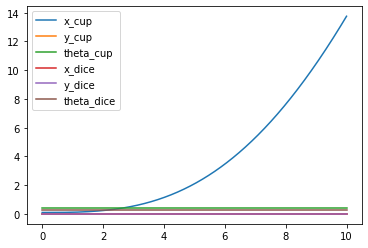

In [10]:
import matplotlib.pyplot as plt

t_span = np.linspace(0,10,1000)
y0 = traj[0]
y1 = traj[1]
y2 = traj[2]
y3 = traj[3]
y4 = traj[4]
y5 = traj[5]
y6 = traj[6]
y7 = traj[7]
y8 = traj[8]
# print(y)
plt.plot(t_span,y0,label = "x_cup")
plt.plot(t_span,y1,label = "y_cup")
plt.plot(t_span,y2,label = "theta_cup")
plt.plot(t_span,y3,label = "x_dice")
plt.plot(t_span,y4,label = "y_dice")
plt.plot(t_span,y5,label = "theta_dice")
# plt.plot(t_span,y6,label = "x_dot_dice")
# plt.plot(t_span,y7,label = "y_dot_dice")
# plt.plot(t_span,y8,label = "theta_dot_dice")
plt.legend()
plt.show()
# # print(y)

In [11]:
phi_c1_d1 = g_c1_d1[0,3]
phi_c1_d2 = g_c1_d2[0,3]
phi_c1_d3 = g_c1_d3[0,3]
phi_c1_d4 = g_c1_d4[0,3]

phi_c2_d1 = g_c2_d1[1,3]
phi_c2_d2 = g_c2_d2[1,3]
phi_c2_d3 = g_c2_d3[1,3]
phi_c2_d4 = g_c2_d4[1,3]

phi_c3_d1 = g_c3_d1[0,3]
phi_c3_d2 = g_c3_d2[0,3]
phi_c3_d3 = g_c3_d3[0,3]
phi_c3_d4 = g_c3_d4[0,3]

phi_c4_d1 = g_c4_d1[1,3]
phi_c4_d2 = g_c4_d2[1,3]
phi_c4_d3 = g_c4_d3[1,3]
phi_c4_d4 = g_c4_d4[1,3]

d_top_left = g_WD*Matrix([-L_dice/2,W_dice/2,0,1])
d_top_right = g_WD*Matrix([L_dice/2,W_dice/2,0,1])
d_bot_left = g_WD*Matrix([-L_dice/2,-W_dice/2,0,1])
d_bot_right = g_WD*Matrix([L_dice/2,-W_dice/2,0,1])
                          
c_left= (g_WC*Matrix([-L_cup,-W_cup,0,1]))[0]
c_right = (g_WC*Matrix([L_cup,W_cup,0,1]))[0]
c_top = (g_WC*Matrix([-L_cup,W_cup,0,1]))[1]
c_bot = (g_WC*Matrix([L_cup,-W_cup,0,1]))[1]

phi_1 = d_top_left[0] - c_left
phi_2 = d_top_left[0] - c_right
phi_3 = d_top_left[1] - c_top
phi_4 = d_top_left[1] - c_bot

phi_5 = d_top_right[0] - c_left
phi_6 = d_top_right[0] - c_right
phi_7= d_top_right[1] - c_top
phi_8 = d_top_right[1] - c_bot

phi_9 = d_bot_left[0] - c_left
phi_10 = d_bot_left[0] - c_right
phi_11 = d_bot_left[1] - c_top
phi_12 = d_bot_left[1] - c_bot

phi_13 = d_bot_right[0] - c_left
phi_14 = d_bot_right[0] - c_right
phi_15 = d_bot_right[1] - c_top
phi_16 = d_bot_right[1] - c_bot

phi = Matrix([phi_1,phi_2,phi_3,phi_4,
             phi_5,phi_6,phi_7,phi_8,
             phi_9,phi_10,phi_11,phi_12,
             phi_13,phi_14,phi_15,phi_16])
# phi = Matrix([phi_c1_d1,phi_c1_d2,phi_c1_d3,phi_c1_d4,
#              phi_c2_d1,phi_c2_d2,phi_c2_d3,phi_c2_d4,
#              phi_c3_d1,phi_c3_d2,phi_c3_d3,phi_c3_d4,
#              phi_c4_d1,phi_c4_d2,phi_c4_d3,phi_c4_d4])
phi = sym.simplify(phi)
dphidq = (phi.jacobian(q))
# display(phi_c1_d1)
# display(g_c1_d1)
display(phi_1)

-x_cup(t)*cos(theta_cup(t)) + x_dice(t)*cos(theta_dice(t)) + y_cup(t)*sin(theta_cup(t)) - y_dice(t)*sin(theta_dice(t)) - 5*sin(theta_cup(t)) - 0.5*sin(theta_dice(t)) + 5*cos(theta_cup(t)) - 0.5*cos(theta_dice(t))

In [12]:
ham = (dLdqdot*q_dot)[0]-LE[0]
lamb = Symbol('lambda') 

x_cup_dummy,y_cup_dummy,theta_cup_dummy = symbols('x_cup,y_cup,theta_cup')
xdot_cup_dummy, ydot_cup_dummy,thetadot_cup_dummy = symbols('xdot_cup,ydot_cup,thetadot_cup')
x_dice_dummy,y_dice_dummy,theta_dice_dummy = symbols('x_dice,y_dice,theta_dice')
xdot_dice_dummy, ydot_dice_dummy,thetadot_dice_dummy = symbols('xdot_dice,ydot_dice,thetadot_dice')
dummy_dict_neg = {q[0]:x_cup_dummy,q[1]:y_cup_dummy,q[2]:theta_cup_dummy,\
             q[3]:x_dice_dummy,q[4]:y_dice_dummy,q[5]:theta_dice_dummy,\
             q_dot[0]:xdot_cup_dummy,q_dot[1]:ydot_cup_dummy,q_dot[2]:thetadot_cup_dummy,\
             q_dot[3]:xdot_dice_dummy,q_dot[4]:ydot_dice_dummy,q_dot[5]:thetadot_dice_dummy}


x_cup_dummy_pos,y_cup_dummy_pos,theta_cup_dummy_pos = symbols('x_cup_^+,y_cup_^+,theta_cup_^+')
xdot_cup_dummy_pos, ydot_cup_dummy_pos,thetadot_cup_dummy_pos = symbols('xdot_cup_^+,ydot_cup_^+,thetadot_cup_^+')
x_dice_dummy_pos,y_dice_dummy_pos,theta_dice_dummy_pos = symbols('x_dice_^+,y_dice_^+,theta_dice_^+')
xdot_dice_dummy_pos, ydot_dice_dummy_pos,thetadot_dice_dummy_pos = symbols('xdot_dice_^+,ydot_dice_^+,thetadot_dice_^+')
dummy_dict_pos = {q[0]:x_cup_dummy,q[1]:y_cup_dummy,q[2]:theta_cup_dummy,\
             q[3]:x_dice_dummy,q[4]:y_dice_dummy,q[5]:theta_dice_dummy,\
             q_dot[0]:xdot_cup_dummy_pos,q_dot[1]:ydot_cup_dummy_pos,q_dot[2]:thetadot_cup_dummy_pos,\
             q_dot[3]:xdot_dice_dummy_pos,q_dot[4]:ydot_dice_dummy_pos,q_dot[5]:thetadot_dice_dummy_pos}


dLdq_dot_minus = dLdqdot.subs(dummy_dict_neg)
dphidq_neg = dphidq.subs(dummy_dict_neg)
ham_neg = ham.subs(dummy_dict_neg)

dLdq_dot_pos = dLdqdot.subs(dummy_dict_pos)
dphidq_pos = dphidq.subs(dummy_dict_pos)
ham_pos = ham.subs(dummy_dict_pos)

In [13]:
impact_eqns_lhs = Matrix([ dLdq_dot_pos[0] - dLdq_dot_minus[0],dLdq_dot_pos[1] - dLdq_dot_minus[1],\
                          dLdq_dot_pos[2] - dLdq_dot_minus[2],dLdq_dot_pos[3] - dLdq_dot_minus[3],\
                          dLdq_dot_pos[4] - dLdq_dot_minus[4],dLdq_dot_pos[5] - dLdq_dot_minus[5],\
                          ham_pos-ham_neg])
impact_eqns_lhs = sym.simplify(impact_eqns_lhs)
impact_eqns_placeholder = []
len_dphidq = len(dphidq_neg[:,0])
for i in range(len_dphidq):
    impact_eqns_rhs_temp = Matrix([ lamb*dphidq_neg[i,0], lamb*dphidq_neg[i,1],lamb*dphidq_neg[i,2],
                          lamb*dphidq_neg[i,3], lamb*dphidq_neg[i,4],lamb*dphidq_neg[i,5],
                          0 ])
    impact_eqns = Eq(impact_eqns_lhs,impact_eqns_rhs_temp)
    impact_eqns = sym.simplify(impact_eqns)
    impact_eqns_placeholder.append(impact_eqns)
    
phi_dummy = phi.subs(dummy_dict_neg)
phi_func = sym.lambdify([x_cup_dummy,y_cup_dummy,theta_cup_dummy,
                       x_dice_dummy,y_dice_dummy,theta_dice_dummy,
                       xdot_cup_dummy, ydot_cup_dummy,thetadot_cup_dummy,
                       xdot_dice_dummy, ydot_dice_dummy,thetadot_dice_dummy],phi_dummy,modules = sym)

# display(impact_eqns_placeholder[0])

In [14]:

def impact_upate_dice_cup(s,impact_eqns,sym_list):
#     display(impact_eqns)
    subs_dict = {x_cup_dummy:s[0],y_cup_dummy:s[1],theta_cup_dummy:s[2],
                x_dice_dummy:s[3],y_dice_dummy:s[4],theta_dice_dummy:s[5],
                 xdot_cup_dummy:s[6], ydot_cup_dummy:s[7],thetadot_cup_dummy:s[8],
                xdot_dice_dummy:s[9], ydot_dice_dummy:s[10],thetadot_dice_dummy:s[11]}
    print('impact?')
    new_impact_eqns = impact_eqns.subs(subs_dict)
    display(new_impact_eqns)
    print('impact??')
    impact_solns = sym.solve(new_impact_eqns,[xdot_cup_dummy_pos, ydot_cup_dummy_pos,thetadot_cup_dummy_pos,\
                                             xdot_dice_dummy_pos, ydot_dice_dummy_pos,thetadot_dice_dummy_pos,lamb],dict=True)
    print('impact???')
    if len(impact_solns) ==1:
        print("Damn only one solution...")
    else:
        for sol in impact_solns:
            lamb_sol = sol[lamb]
            if abs(lamb_sol)<1e-06:
                pass
            else:
                return np.array([
                    s[0],
                    s[1],
                    s[2],
                    s[3],
                    s[4],
                    s[5],
                    float(sym.N(sol[sym_list[0]])),
                    float(sym.N(sol[sym_list[1]])),
                    float(sym.N(sol[sym_list[2]])),
                    float(sym.N(sol[sym_list[3]])),
                    float(sym.N(sol[sym_list[4]])),
                    float(sym.N(sol[sym_list[5]]))],dtype=float)
            
# s_test = np.array([0,0,0,0,0,0,0,0,0,0,0,0])
# impact_upate_dice_cup(s_test,impact_eqns,[xdot_cup_dummy_pos, ydot_cup_dummy_pos,thetadot_cup_dummy_pos,
#                                              xdot_dice_dummy_pos, ydot_dice_dummy_pos,thetadot_dice_dummy_pos])

In [15]:
def impact_condition(s, phi_func,threshold =1e-1):
    phi_val = phi_func (*s)
#     display(phi_val)
    for i in range(len(phi_val[0,:])):
        if phi_val[i] > -threshold and phi_val[i] < threshold:
            return (True, i)
    return (False,None)
def simulate_with_impact(f, x0 , tspan , dt , integrate):

    N = int((max(tspan)-min(tspan))/dt)
    x = np.copy(x0) 
    tvec = np.linspace(min(tspan),max(tspan),N)
    xtraj = np.zeros((len(x0),N))
    time = 0
    for i in range(N):
#         print('iter',i)
        time = time+dt
#         print('hi')
        (is_impact,impact_num) = impact_condition(x,phi_func,1e-1)
#         print('bye')
        display(is_impact)
        if is_impact is True:
            x = impact_upate_dice_cup(x,impact_eqns_placeholder[impact_num],[xdot_cup_dummy_pos, ydot_cup_dummy_pos,thetadot_cup_dummy_pos,\
                                            xdot_dice_dummy_pos, ydot_dice_dummy_pos,thetadot_dice_dummy_pos])
#             print("x after impact update")
#             display(x) 
            print('BAM',i)
            xtraj[:,i]= integrate(f,x,dt,time)
        else:
            xtraj[:,i]= integrate(f,x,dt,time)
        x = np.copy(xtraj[:,i]) 
    return xtraj

traj_impact = simulate_with_impact(dyn,s0,t_span,0.01,integrate)


False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

False

True

impact?


Eq(Matrix([
[                                  0.921060994002885*lambda],
[                                 -0.389418342308651*lambda],
[-lambda*(-5.0*sqrt(2)*sin(0.4 + pi/4) + 0.817348715408524)],
[                                 -0.955336489125606*lambda],
[                                   0.29552020666134*lambda],
[                        0.5*sqrt(2)*lambda*cos(0.3 + pi/4)],
[                                                         0]]), Matrix([
[                                                                                                                                                                                   11.5556027923902 - 10.0*xdot_cup_^+],
[                                                                                                                                                                  -20.9889629379784*thetadot_cup_^+ - 10.0*ydot_cup_^+],
[                                                                                                          

impact??


KeyboardInterrupt: 

In [ ]:
x_cup_impact = traj_impact[0]
y_cup_impact = traj_impact[1]
theta_cup_impact = traj_impact[2]
x_dice_impact = traj_impact[3]
y_dice_impact = traj_impact[4]
theta_dice_impact = traj_impact[5]
plt.plot(t_span,x_cup_impact,label = "x_cup")
plt.plot(t_span,y_cup_impact,label = "y_cup")
# plt.plot(t_span,theta_cup_impact,label = "theta_cup")
plt.plot(t_span,x_dice_impact,label = "x_dice")
plt.plot(t_span,y_dice_impact,label = "y_dice")
# plt.plot(t_span,theta_dice_impact,label = "theta_dice")
plt.legend()
plt.show()
# plt.plot(t_span,y2,label = "theta_cup")
# yyy = traj_impact[0]
# display(yyy)

In [ ]:
def animate(traj,L_cup,W_cup,L_dice,W_dice,T=10):
#     print(len(input_array))
#     print(L)
#     print('yes')
    """
    Function to generate web-based animation of double-pendulum system

    Parameters:
    ================================================
    theta_array:new_impact_eqns
        trajectory of theta1 and theta2, should be a NumPy array with
        shape of (2,N)
    L1:
        length of the first pendulum
    L2:
        length of the second pendulum
    T:
        length/seconds of animation duration

    Returns: None
    """

    ################################
    # Imports required for animation.
    from plotly.offline import init_notebook_mode, iplot
    from IPython.display import display, HTML
    import plotly.graph_objects as go

    #######################
    # Browser configuration.
    def configure_plotly_browser_state():
        import IPython
        display(IPython.core.display.HTML('''
            <script src="/static/components/requirejs/require.js"></script>
            <script>
              requirejs.config({
                paths: {
                  base: '/static/base',
                  plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
                },
              });
            </script>
            '''))
    configure_plotly_browser_state()
    init_notebook_mode(connected=False)

    ###############################################
    # Getting data from pendulum angle trajectories.
    

    
    xx_cup=traj[0]
    yy_cup=traj[1]
    theta_cup_traj=traj[2]
    xx_dice=traj[3]
    yy_dice=traj[4]
    theta_dice_traj=traj[5]
#     print(yy_cup)
    
    N = len(traj[0]) # Need this for specifying length of simulation
    
    cube_pt1_x_array = np.zeros(N,dtype=np.float32)
    cube_pt1_y_array = np.zeros(N,dtype=np.float32)
    cube_pt2_x_array = np.zeros(N,dtype=np.float32)
    cube_pt2_y_array = np.zeros(N,dtype=np.float32)
    cube_pt3_x_array = np.zeros(N,dtype=np.float32)
    cube_pt3_y_array = np.zeros(N,dtype=np.float32)
    cube_pt4_x_array = np.zeros(N,dtype=np.float32)
    cube_pt4_y_array = np.zeros(N,dtype=np.float32)
    
    dice_pt1_x_array = np.zeros(N,dtype=np.float32)
    dice_pt1_y_array = np.zeros(N,dtype=np.float32)
    dice_pt2_x_array = np.zeros(N,dtype=np.float32)
    dice_pt2_y_array = np.zeros(N,dtype=np.float32)
    dice_pt3_x_array = np.zeros(N,dtype=np.float32)
    dice_pt3_y_array = np.zeros(N,dtype=np.float32)
    dice_pt4_x_array = np.zeros(N,dtype=np.float32)
    dice_pt4_y_array = np.zeros(N,dtype=np.float32)
    
    
#     W_cup = L_cup = 1
#     W_dice = L_dice = 1
    r = np.array([0,0,0,1])
    r_cup1 = np.array([W_cup/2,L_cup/2,0,1])
    r_cup2 = np.array([-W_cup/2,L_cup/2,0,1])
    r_cup3 = np.array([-W_cup/2,-L_cup/2,0,1])
    r_cup4 = np.array([W_cup/2,-L_cup/2,0,1])
    
    r_dice1 = np.array([W_dice/2,0,0,1])
    r_dice2 = np.array([-W_dice/2,0,0,1])
    r_dice3 = np.array([0,L_dice/2,0,1])
    r_dice4 = np.array([0,-L_dice/2,0,1])
    
    
#     N = len(x_traj) # Need this for specifying length of simulation

    ###############################################
    # Define arrays containing data for frame axes
    # In each frame, the x and y axis are always fixed
#     x_axis = np.array([0.1, 0.0])
#     y_axis = np.array([0.0, 0.1])
    
#     x_axis_4 = np.array([0.3, 0.0,0,0])
#     y_axis_4 = np.array([0.0, 0.3,0,0])
    
    
    
#     # Use homogeneous tranformation to transfer these two axes/points
#     # back to the fixed frame
# #     frame_b1

    for i in range(N):
        
#         gnew_WC = 
        g_wc_np = get_se3_np(theta_cup_traj[i],xx_cup[i],yy_cup[i])
        g_wd_np = get_se3_np(theta_dice_traj[i],xx_dice[i],yy_dice[i])
        
        c1 = g_wc_np@r_cup1
        cube_pt1_x_array[i] = c1[0]
        cube_pt1_y_array[i] = c1[1]
        c2 = g_wc_np@r_cup2
        cube_pt2_x_array[i] = c2[0]
        cube_pt2_y_array[i] = c2[1]
        c3 = g_wc_np@r_cup3
        cube_pt3_x_array[i] = c3[0]
        cube_pt3_y_array[i] = c3[1]
        c4 = g_wc_np@r_cup4
        cube_pt4_x_array[i] = c4[0]
        cube_pt4_y_array[i] = c4[1]
        
        d1 = g_wd_np@r_dice1
        dice_pt1_x_array[i] = d1[0]
        dice_pt1_y_array[i] = d1[1]
        d2 = g_wd_np@r_dice2
        dice_pt2_x_array[i] = d2[0]
        dice_pt2_y_array[i] = d2[1]
        d3 = g_wd_np@r_dice3
        dice_pt3_x_array[i] = d3[0]
        dice_pt3_y_array[i] = d3[1]
        d4 = g_wd_np@r_dice4
        dice_pt4_x_array[i] = d4[0]
        dice_pt4_y_array[i] = d4[1]
        
#         d1 = g_wd_np@r_dice1
#         d2 = g_wd_np@r_dice2
#         d3 = g_wd_np@r_dice3
#         d4 = g_wd_np@r_dice4
#         display(r_d_y[:])
    ####################################
    # Using these to specify axis limits.
    xm = -10 #np.min(xx1)-0.5
    xM = 10 #np.max(xx1)+0.5
    ym = -10 #np.min(yy1)-2.5
    yM = 10 #np.max(yy1)+1.5

    ###########################
    # Defining data dictionary.
    # Trajectories are here.
    data=[
        # note that except for the trajectory (which you don't need this time),
        # you don't need to define entries other than "name". The items defined
        # in this list will be related to the items defined in the "frames" list
        # later in the same order. Therefore, these entries can be considered as 
        # labels for the components in each animation frame
        dict(name='Cup Center'),
        dict(name='Dice Center'),
        dict(name='Cup'),
        dict(name='Dice'),
#         dict(name='Frame A x'),
#         dict(name='Frame A x'),
#         dict(name='Frame B x'),
#         dict(name='Frame B y'),
#         dict(name='Frame C x'),
#         dict(name='Frame C y'),
#         dict(name='Frame D x'),
#         dict(name='Frame D y'),
#         dict(name='Frame E x'),
#         dict(name='Frame E y'),
#         dict(name='Frame AB x'),
#         dict(name='Frame AB y'),
#         dict(name='Frame AC x'),
#         dict(name='Frame AC y'),
#         dict(name='Ground'),
        
#         dict(name='Right Endpoint'),
#         dict(name='Center Point'),


        # You don't need to show trajectory this time,
        # but if you want to show the whole trajectory in the animation (like what
        # you did in previous homeworks), you will need to define entries other than 
        # "name", such as "x", "y". and "mode".

        # dict(x=xx1, y=yy1, 
        #      mode='markers', name='Pendulum 1 Traj', 
        #      marker=dict(color="fuchsia", size=2)
        #     ),
        # dict(x=xx2, y=yy2, 
        #      mode='markers', name='Pendulum 2 Traj', 
        #      marker=dict(color="purple", size=2)
        #     ),
        ]

    ################################
    # Preparing simulation layout.
    # Title and axis ranges are here.
    layout=dict(autosize=False, width=1000, height=1000,
                xaxis=dict(range=[xm, xM], autorange=False, zeroline=False,dtick=1),
                yaxis=dict(range=[ym, yM], autorange=False, zeroline=False,scaleanchor = "x",dtick=1),
                title='Problem 3 Animation', 
                hovermode='closest',
                updatemenus= [{'type': 'buttons',
                               'buttons': [{'label': 'Play','method': 'animate',
                                            'args': [None, {'frame': {'duration': T, 'redraw': False}}]},
                                           {'args': [[None], {'frame': {'duration': T, 'redraw': False}, 'mode': 'immediate',
                                            'transition': {'duration': 0}}],'label': 'Pause','method': 'animate'}
                                          ]
                              }]
               )

    ########################################
    # Defining the frames of the simulation.
    # This is what draws the lines from
    # joint to joint of the pendulum.
#     print('check HEREEEEE')
    frames=[dict(data=[# first three objects correspond to the arms and two masses,
                       # same order as in the "data" variable defined above (thus 
                       # they will be labeled in the same order)
#                        dict(x=[rL1[0][k],rL2[0][k],rL3[0][k],rL4[0][k],rL1[0][k]], 
#                             y=[rL1[1][k],rL2[1][k],rL3[1][k],rL4[1][k],rL1[1][k]], 
#                             mode='lines',
#                             line=dict(color='orange', width=3),
#                             ),
                        go.Scatter(
                            x=[xx_cup[k]],
                            y=[yy_cup[k]],
                            mode="markers",
                            marker=dict(color="blue", size=3)),
                        go.Scatter(
                            x=[xx_dice[k]],
                            y=[yy_dice[k]],
                            mode="markers",
                            marker=dict(color="purple", size=12)),
                        dict(x=[cube_pt1_x_array[k],cube_pt2_x_array[k],cube_pt3_x_array[k],cube_pt4_x_array[k],cube_pt1_x_array[k]], 
                            y=[cube_pt1_y_array[k],cube_pt2_y_array[k],cube_pt3_y_array[k],cube_pt4_y_array[k],cube_pt1_y_array[k]], 
                            mode='lines',
                            line=dict(color='blue', width=3),
                            ),
                        dict(x=[xx_dice[k],dice_pt1_x_array[k],dice_pt2_x_array[k],xx_dice[k],dice_pt3_x_array[k],dice_pt4_x_array[k]], 
                            y=[yy_dice[k],dice_pt1_y_array[k],dice_pt2_y_array[k],yy_dice[k],dice_pt3_y_array[k],dice_pt4_y_array[k]], 
                            mode='lines',
                            line=dict(color='red', width=3),
                            ),
                      ]) for k in range(N)]

    #######################################
    # Putting it all together and plotting.
    figure1=dict(data=data, layout=layout, frames=frames)           
    iplot(figure1)
    
    
animate(traj_impact,L_cup=1,W_cup=1,L_dice=0.5,W_dice=0.5,T=10)